In [2]:
!pip install lasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.2 MB/s eta 0:00:00


In [3]:
# Import relevant libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import lasio
print('Done Importing')

Done Importing


In [4]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Get the file name (assumes only one file is uploaded)
filename = list(uploaded.keys())[0]

# Read CSV into a DataFrame
df = pd.read_csv(filename)

# Display first few rows
df.head()


Saving final_VSh_attributes.csv to final_VSh_attributes.csv


,Time,Volume_of_Shale,energy,insta_amp,insta_hilbert,spectral_decomp,F3_Seismic_Data,F3_Velocity_Data,freq_absorb,pseudo_relief
0,0.000000,1.000000e+30,1.000000e+30,27.025831,27.025831,1.000000e+30,0.0,1795.994263,1.000000e+30,-43487.37109
1,0.172712,1.000000e+30,1.000000e+30,26.860659,26.860659,1.000000e+30,0.0,1795.994385,1.000000e+30,-44260.15625
2,0.345437,1.000000e+30,1.000000e+30,26.695484,26.695484,1.000000e+30,0.0,1795.994385,1.000000e+30,-45032.95703
3,0.518157,1.000000e+30,1.000000e+30,26.550863,26.550863,1.000000e+30,0.0,1795.994385,1.000000e+30,-45805.73828
4,0.690869,1.000000e+30,1.000000e+30,26.407513,26.407513,1.000000e+30,0.0,1795.994385,1.000000e+30,-46578.52344


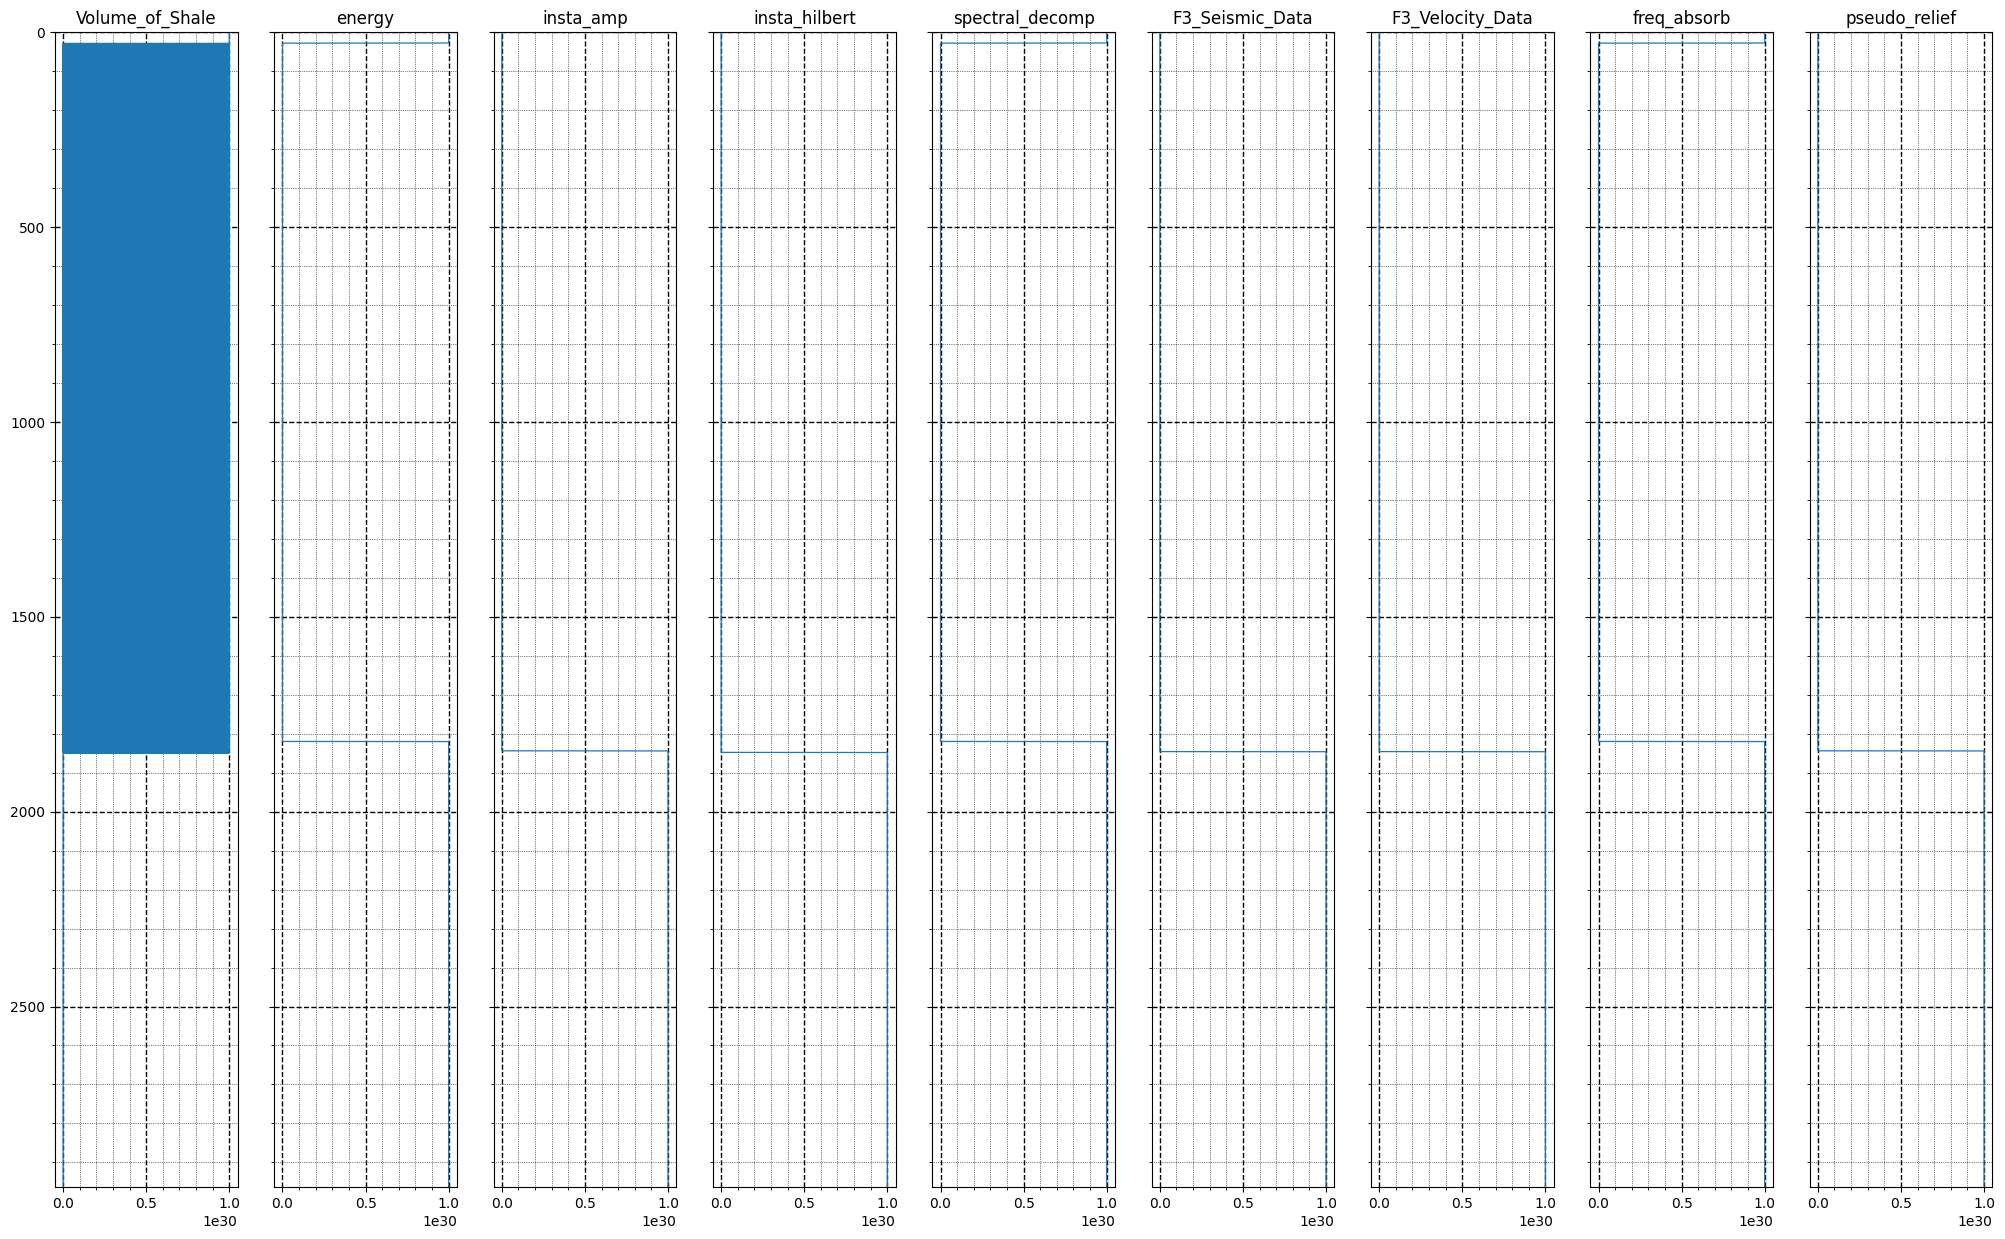

In [5]:
# Plot the Attribute Logs
rows, cols = 1,len(df.columns)-1
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25,15), sharey=True)
names = [ 'Time', 'Volume_of_Shale', 'energy', 'insta_amp', 'insta_hilbert', 'spectral_decomp',
       'F3_Seismic_Data', 'F3_Velocity_Data', 'freq_absorb', 'pseudo_relief' ]
for i in range(cols):
    ax[i].plot(df.iloc[:,i+1], df.iloc[:,0],linewidth='0.9')
    ax[i].set_ylim(max(df.iloc[:, 0]), min(df.iloc[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_title('%s' %names[i+1])

In [53]:
# Prediction libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree, export_text
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
# %%
# Replace 1.000000e+30 with NaN
df.replace(1.000000e+30, np.nan, inplace=True)

# Drop rows where there are NaN values. This will cover all columns.
df_new = df.dropna()

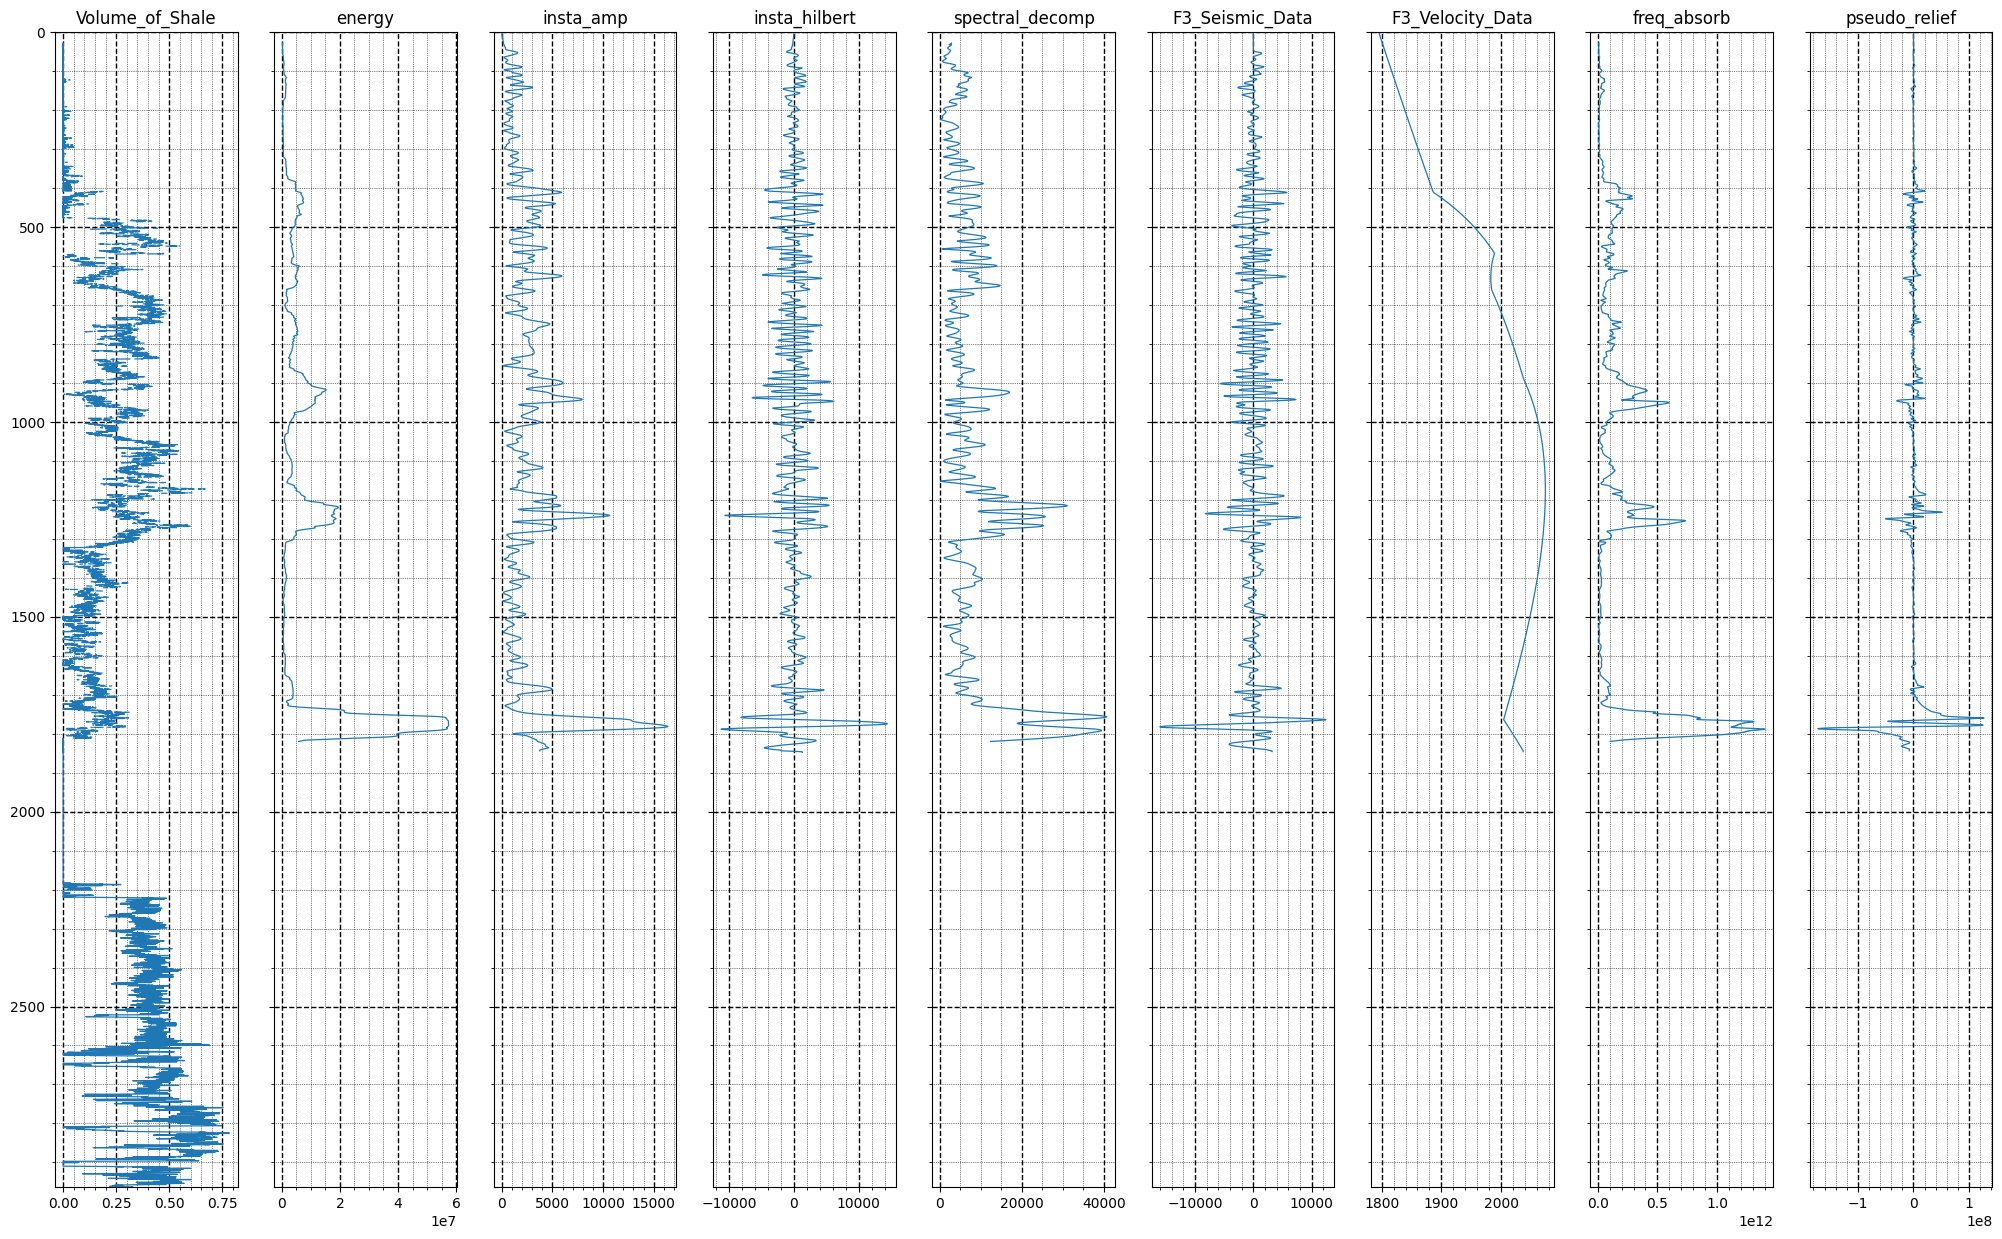

In [54]:
# Plot the Attribute Logs
rows, cols = 1,len(df.columns)-1
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25,15), sharey=True)
names = [ 'Time', 'Volume_of_Shale', 'energy', 'insta_amp', 'insta_hilbert', 'spectral_decomp',
       'F3_Seismic_Data', 'F3_Velocity_Data', 'freq_absorb', 'pseudo_relief' ]
for i in range(cols):
    ax[i].plot(df.iloc[:,i+1], df.iloc[:,0],linewidth='0.9')
    ax[i].set_ylim(max(df.iloc[:, 0]), min(df.iloc[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_title('%s' %names[i+1])

In [55]:
# Zone of Interest data: from 500 to 1100ms
df_new = df[(df.Time >= 500) & (df.Time <= 1100)]
df_new.describe()

,Time,Volume_of_Shale,energy,insta_amp,insta_hilbert,spectral_decomp,F3_Seismic_Data,F3_Velocity_Data,freq_absorb,pseudo_relief
count,9055.000000,6149.000000,9.055000e+03,9055.000000,9055.000000,9055.000000,9055.000000,9055.000000,9.055000e+03,9.055000e+03
mean,806.791810,0.278649,4.509786e+06,2606.397786,-20.884363,6156.345719,25.715635,2021.278818,1.230768e+11,-1.593945e+05
std,173.008366,0.109788,3.130483e+06,1451.656697,2002.970324,3341.668423,1991.218451,33.728025,1.044355e+11,5.644327e+06
min,500.013245,0.000000,9.020181e+05,120.464310,-6439.815918,554.206482,-5616.706055,1954.884033,1.600000e+10,-3.007478e+07
25%,658.202820,0.194400,2.594110e+06,1604.125183,-1356.350525,3722.241211,-1401.021423,1987.062378,5.640000e+10,-2.384525e+06
50%,810.708008,0.283417,3.611052e+06,2480.418701,44.285946,5336.295410,27.400642,2021.498169,9.440000e+10,-1.362159e+05
75%,957.047974,0.366548,5.173638e+06,3203.742920,1302.547973,7848.836914,1296.804382,2054.240356,1.390000e+11,2.181146e+06
max,1099.953857,0.547740,1.524920e+07,7942.184082,6172.400391,16979.632810,7313.677734,2071.896240,5.980000e+11,2.086157e+07


In [65]:
# Reapply dropna to remove newly introduced NaN.
df_new.dropna(inplace=True)
df_new.describe()

<ipython-input-65-c377506830a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


,Time,Volume_of_Shale,energy,insta_amp,insta_hilbert,spectral_decomp,F3_Seismic_Data,F3_Velocity_Data,freq_absorb,pseudo_relief
count,6149.000000,6149.000000,6.149000e+03,6149.000000,6149.000000,6149.000000,6149.000000,6149.000000,6.149000e+03,6.149000e+03
mean,809.978400,0.278649,4.525545e+06,2611.868540,-11.484292,6149.208695,26.890146,2021.874226,1.236297e+11,-1.520839e+05
std,173.649155,0.109788,3.162141e+06,1458.547262,2006.938492,3345.845883,1999.452602,33.806778,1.053608e+11,5.688249e+06
min,500.013245,0.000000,9.020181e+05,124.630241,-6439.815918,554.206482,-5615.917480,1954.884033,1.600000e+10,-3.007143e+07
25%,660.920654,0.194400,2.581384e+06,1601.978027,-1350.990000,3726.243408,-1399.087280,1987.294434,5.610000e+10,-2.354905e+06
50%,816.196350,0.283417,3.596116e+06,2472.758545,50.307632,5328.797363,41.608639,2022.674439,9.430000e+10,-1.245003e+05
75%,959.604980,0.366548,5.182577e+06,3203.753906,1302.968750,7810.355469,1294.985596,2054.755127,1.390000e+11,2.181770e+06
max,1099.953857,0.547740,1.524920e+07,7942.184082,6172.400391,16978.097660,7313.677734,2071.896240,5.980000e+11,2.086157e+07


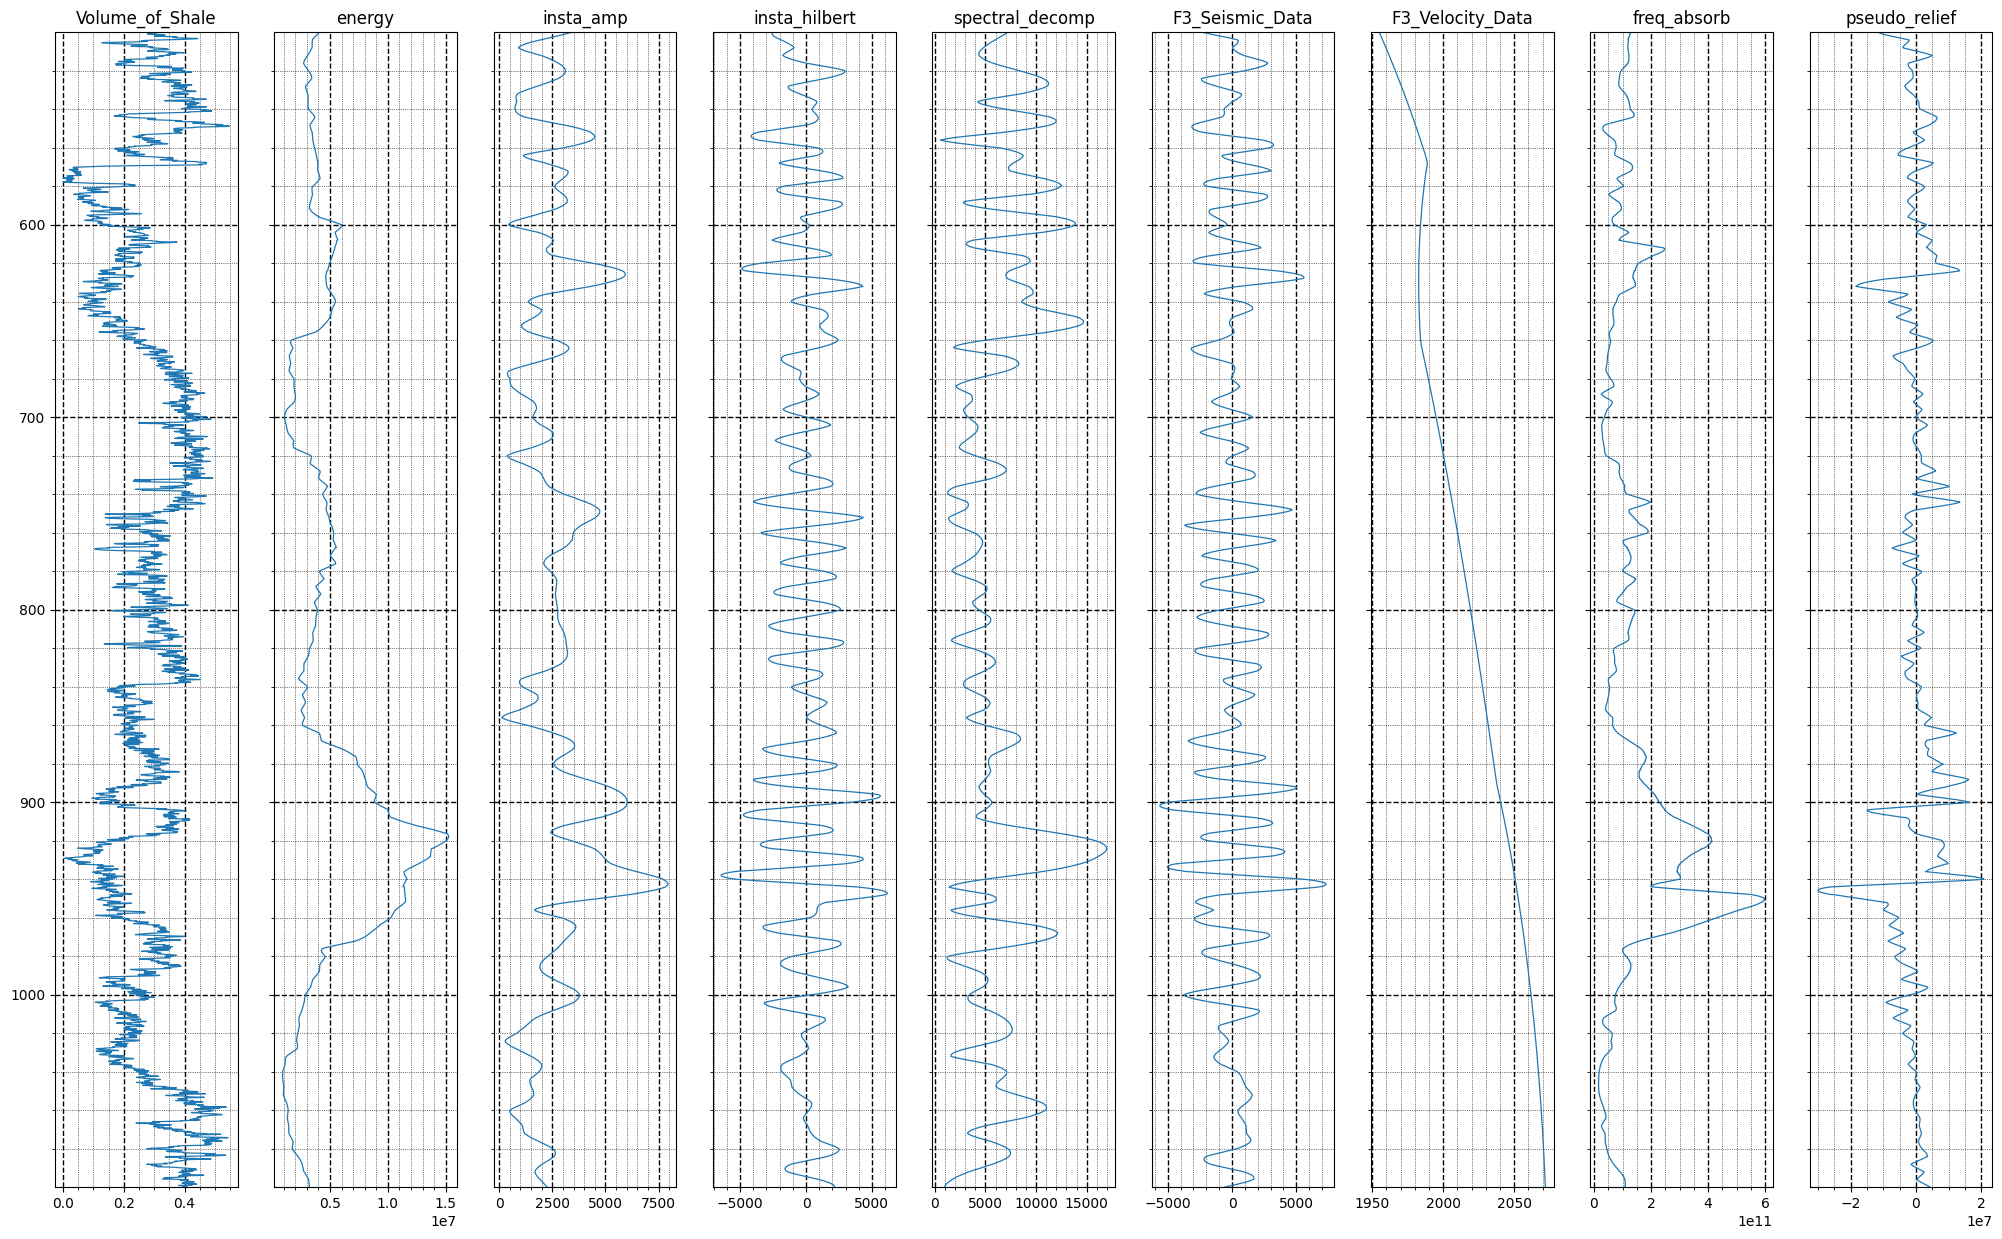

In [66]:
# Plot the Attribute Logs
rows, cols = 1,len(df_new.columns)-1
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25,15), sharey=True)
names = [ 'Time', 'Volume_of_Shale', 'energy', 'insta_amp', 'insta_hilbert', 'spectral_decomp',
       'F3_Seismic_Data', 'F3_Velocity_Data', 'freq_absorb', 'pseudo_relief' ]
for i in range(cols):
    ax[i].plot(df_new.iloc[:,i+1], df_new.iloc[:,0],linewidth='0.9')
    ax[i].set_ylim(max(df_new.iloc[:, 0]), min(df_new.iloc[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_title('%s' %names[i+1])

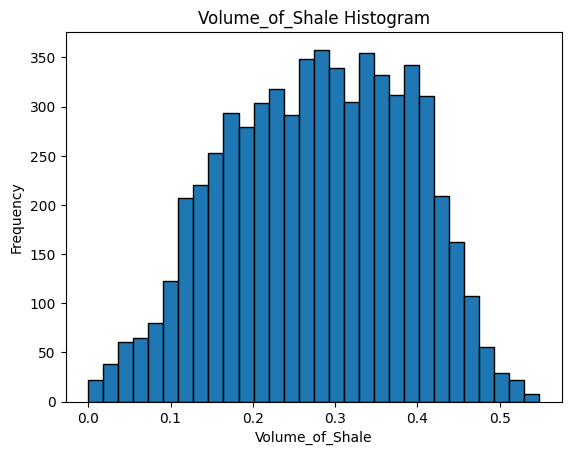

In [67]:
# Plot histogram of the 'Volume_of_Shalel' column
plt.hist(df_new['Volume_of_Shale'], bins=30, edgecolor='black')
plt.xlabel('Volume_of_Shale')
plt.ylabel('Frequency')
plt.title('Volume_of_Shale Histogram')
plt.show()

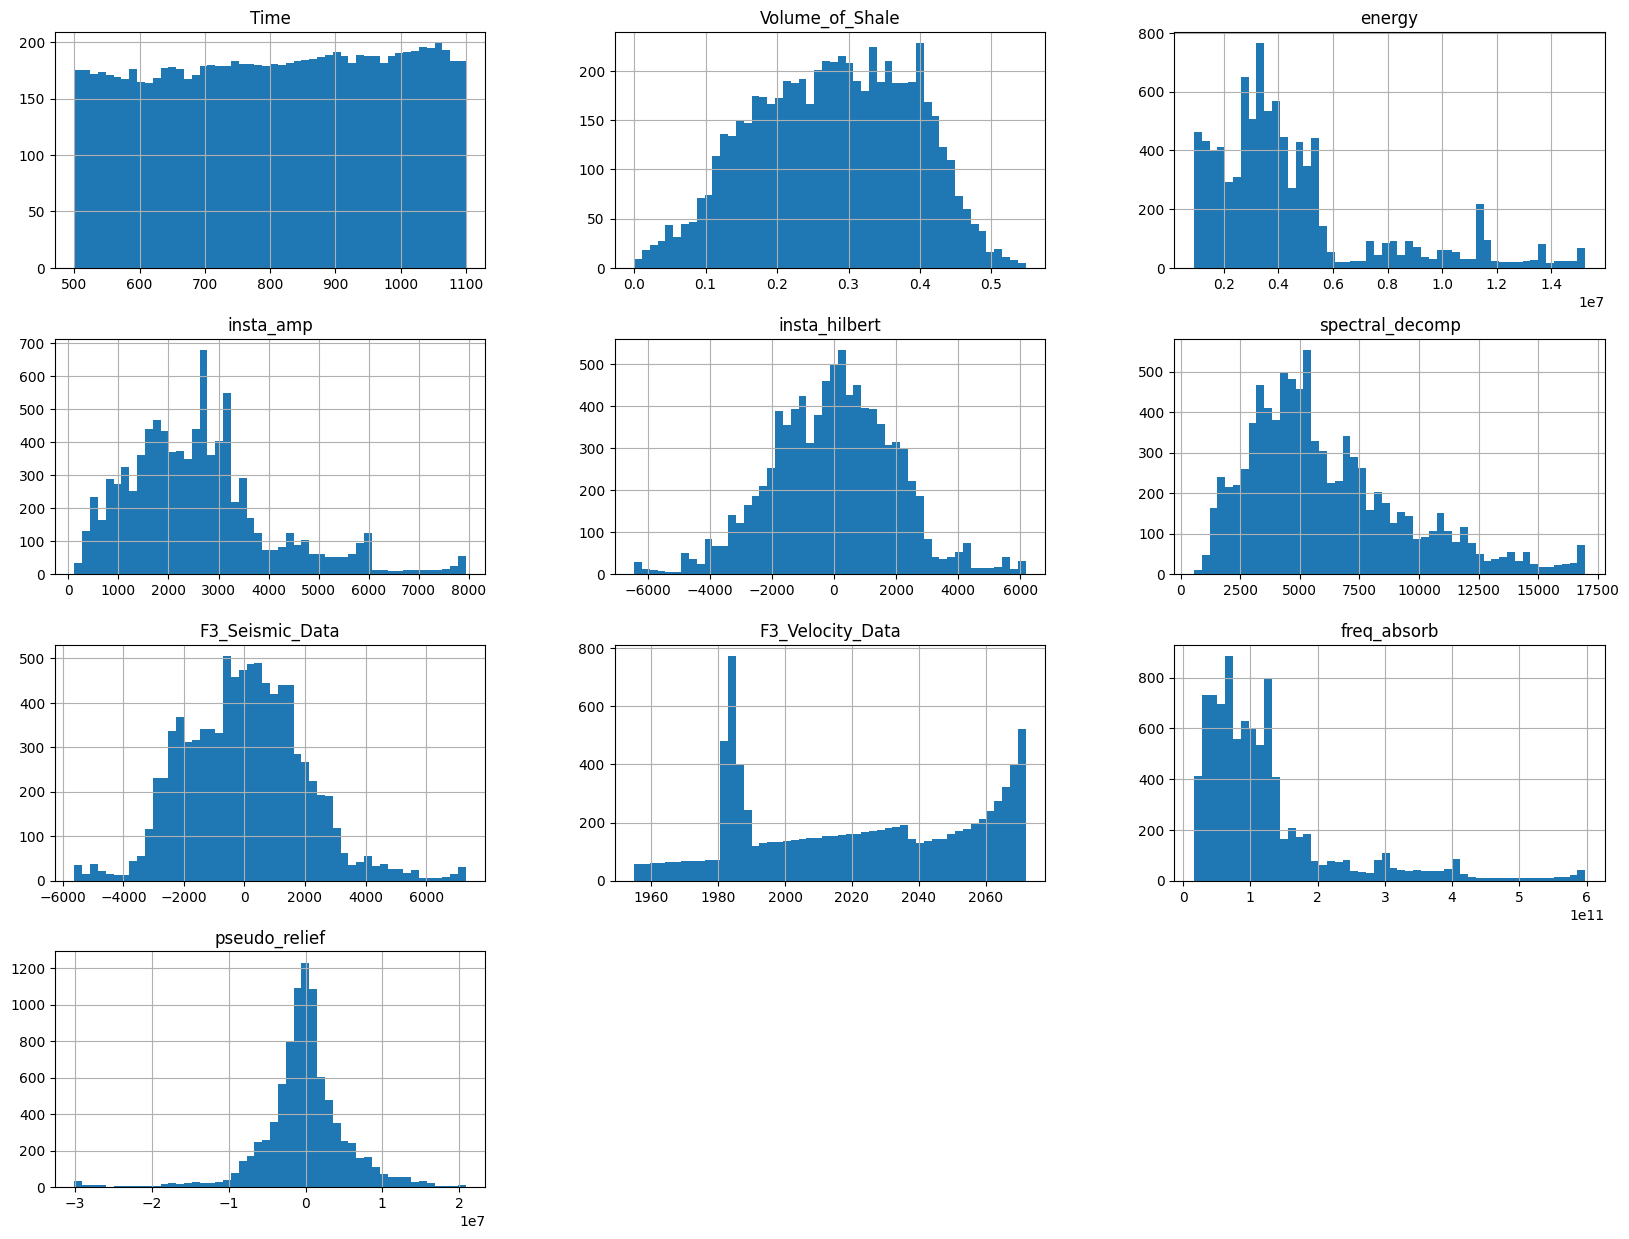

In [58]:
# Plot histograms of the input attributes
df_new.hist(bins=50, figsize=(20,15))
plt.show()

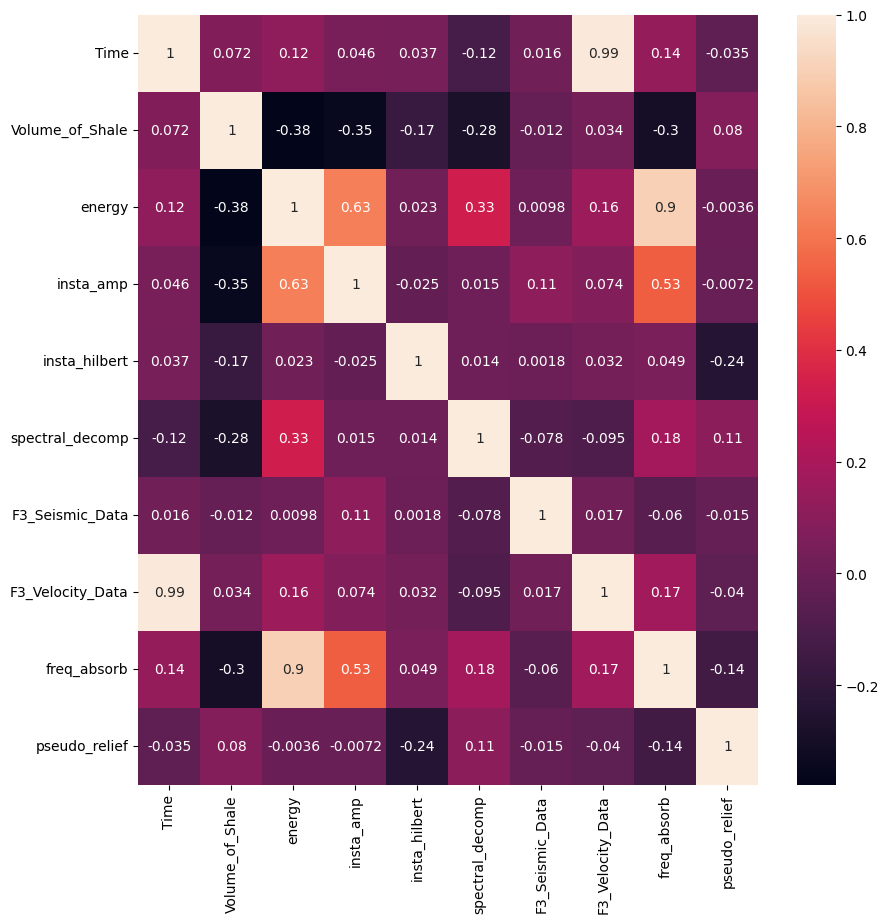

In [68]:
# Plot correlation matrix to show relations between features
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [69]:
# Define dataset and Prediction

Xdata = df_new[[ 'insta_amp', 'freq_absorb' ,'insta_hilbert', 'spectral_decomp',
       'F3_Seismic_Data', 'F3_Velocity_Data', 'pseudo_relief'  ]]
ydata = df_new['Volume_of_Shale']

print("shape of Xdata: ",Xdata.shape)
print("shape of Ydata: ",ydata.shape)

shape of Xdata:  (6149, 7)
shape of Ydata:  (6149,)


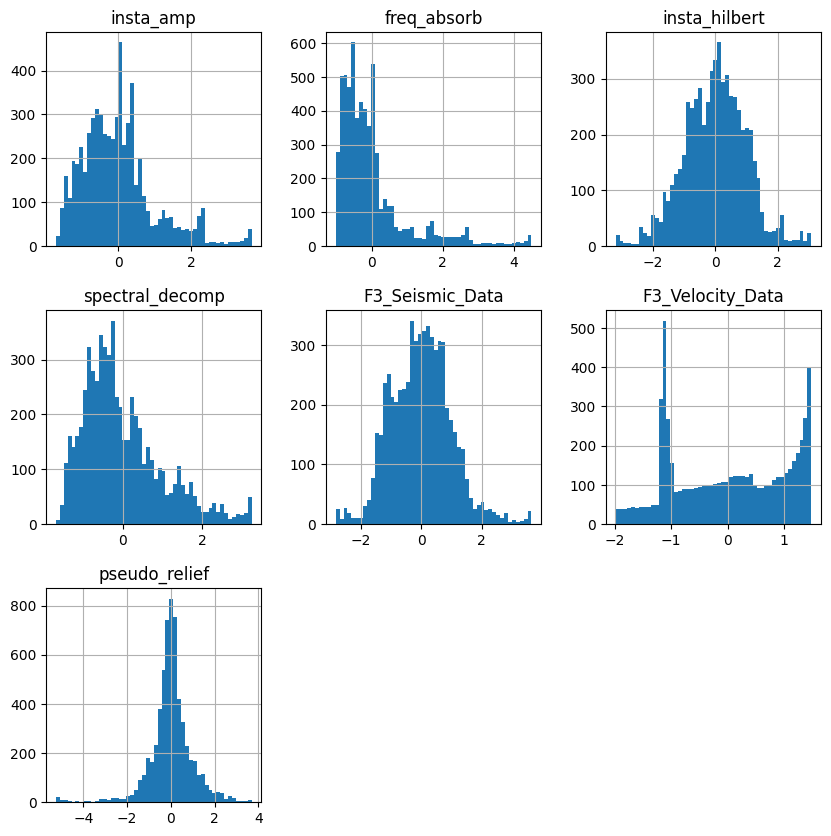

In [70]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the data and transform it
Xdata_S = scaler.fit_transform(Xdata)

# Convert the result back to a DataFrame (optional)
Xdata_new = pd.DataFrame(Xdata_S, columns=Xdata.columns)

# Show the standardized data
Xdata_new.hist(bins=50, figsize=(10,10))
plt.show()

In [71]:
# Feature Importance Parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(Xdata_new, ydata, test_size=0.25)

In [72]:
# check for nan values after split.
print(f"NaN in y_train: {np.isnan(y_train).any()}")
print(f"NaN in y_test: {np.isnan(y_test).any()}")

NaN in y_train: False
NaN in y_test: False


In [73]:
# Random Forest
Rfr = RandomForestRegressor()
Rfr.fit(X_train,y_train)
y_pred=Rfr.predict(X_test)
Rfr.score(X_test,y_test)*100

98.52589808325959

In [74]:
# Feature Importance
feature_imp = pd.Series(Rfr.feature_importances_,index=Xdata.columns).sort_values(ascending=False)
feature_imp

,0
F3_Velocity_Data,0.581343
insta_amp,0.099650
spectral_decomp,0.089952
freq_absorb,0.088387
pseudo_relief,0.055986
insta_hilbert,0.047487
F3_Seismic_Data,0.037194


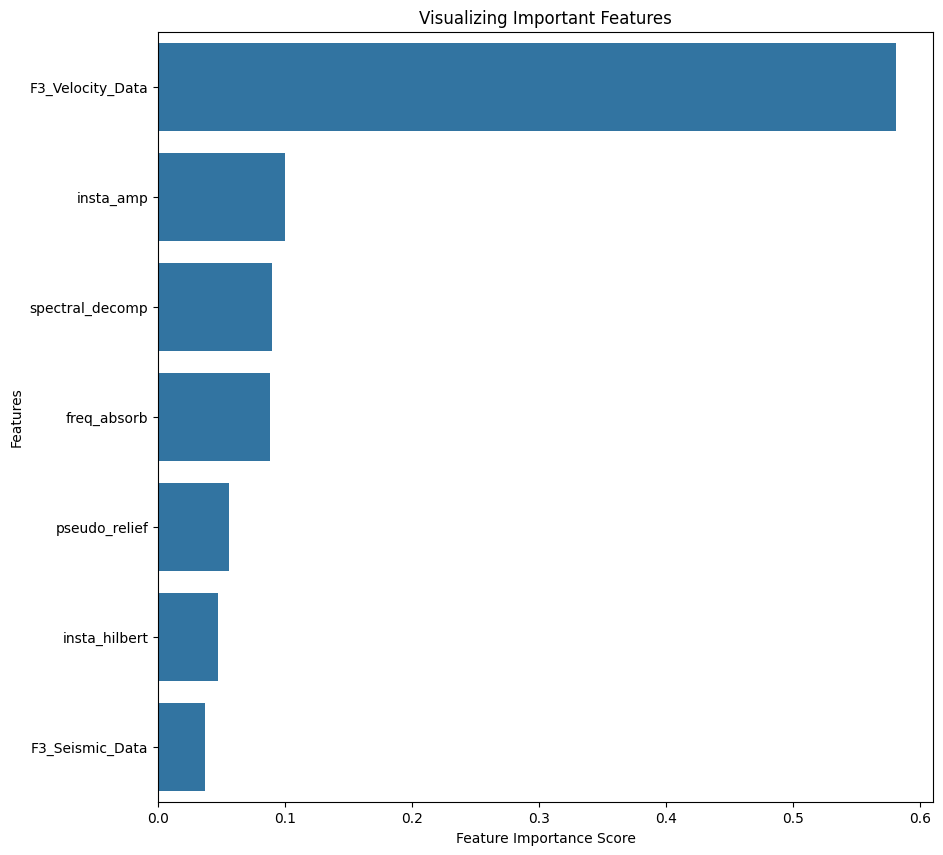

In [75]:
#  Feature Importance Plotting
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [76]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported successfully!")

Libraries imported successfully!


In [78]:
# Prediction libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree, export_text
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

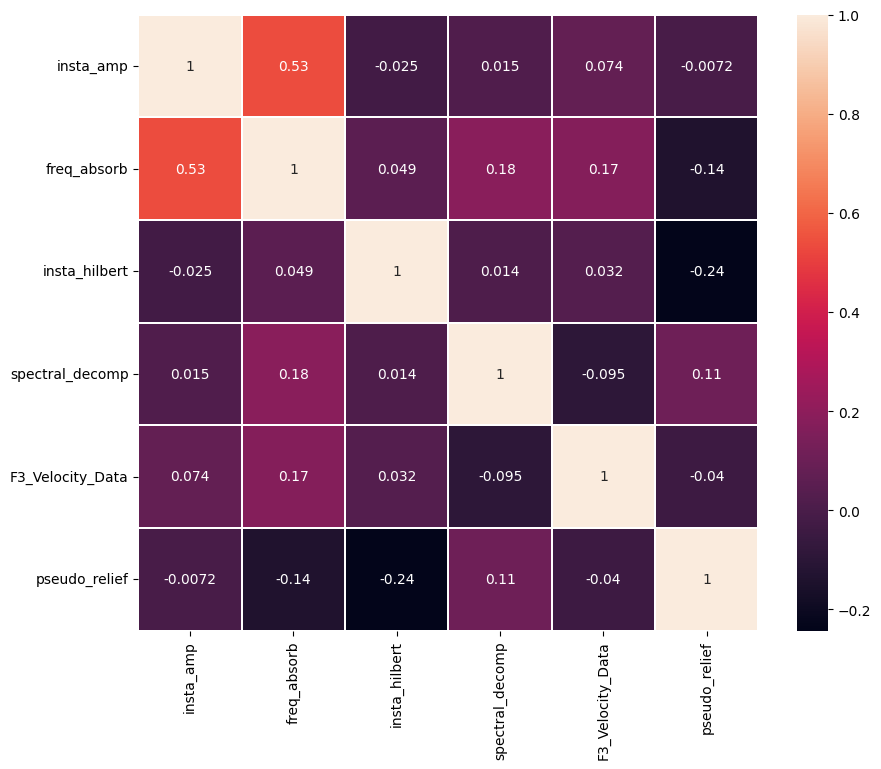

In [79]:
# Input Data
Xdata = df_new[[ 'insta_amp', 'freq_absorb' ,'insta_hilbert', 'spectral_decomp',
       'F3_Velocity_Data', 'pseudo_relief'  ]]
ydata = df_new['Volume_of_Shale']

# Plotting the Correlation Matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(Xdata.corr(),annot=True,ax=ax,linewidths=0.1);

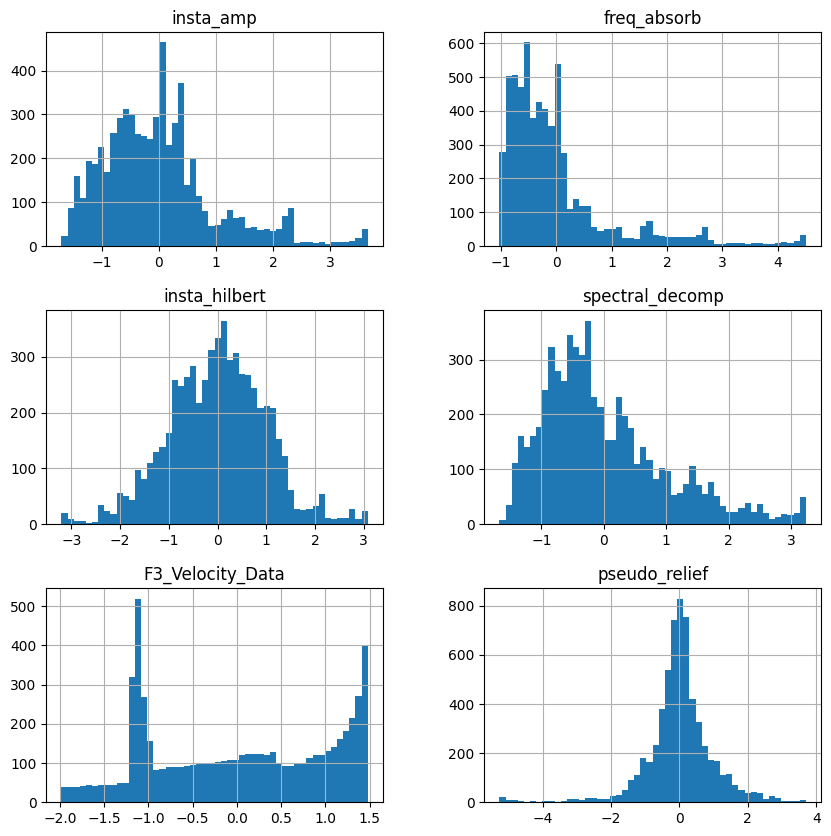

In [80]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the data and transform it
Xdata_S = scaler.fit_transform(Xdata)

# Convert the result back to a DataFrame (optional)
Xdata_new = pd.DataFrame(Xdata_S, columns=Xdata.columns)

# Show the standardized data
Xdata_new.hist(bins=50, figsize=(10,10))
plt.show()

In [81]:
#@title Train Test Split
X_train, X_test, y_train, y_test = train_test_split(Xdata_new, ydata, test_size=0.2, random_state=42)

In [82]:
#@title Model Selection: 1. Linear Regression
# Apply Linear Regression Model to the features
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
# Estimate Predictions
pred_L_reg_train=linear_reg.predict(X_train)
pred_L_reg_test=linear_reg.predict(X_test)
pred_L_reg = linear_reg.predict(Xdata_new)
# Print the RMS Error and Score
print('RMSE for training data = ', round(mean_squared_error(y_train,pred_L_reg_train), 4))
print('R2 Score for training data = ', round(r2_score(y_train, pred_L_reg_train), 2))
print('RMSE for testing data = ', round(mean_squared_error(y_test,pred_L_reg_test), 4))
print('R2 Score for testing data = ', round(r2_score(y_test, pred_L_reg_test), 2))

RMSE for training data =  0.0092
R2 Score for training data =  0.24
RMSE for testing data =  0.0091
R2 Score for testing data =  0.24


In [83]:
#@title 2. Random Forest
# Apply Random Forest Model to the features
RFR = RandomForestRegressor(random_state=42, max_depth=10 ,).fit(X_train, y_train)
# Estimate Predictions
pred_RFR_train= RFR.predict(X_train)
pred_RFR_test=RFR.predict(X_test)
pred_RFR = RFR.predict(Xdata_new)
# Print the RMS Error and Score
# Print the RMS Error and Score
print('RMSE for training data = ', round(mean_squared_error(y_train,pred_RFR_train), 4))
print('R2 Score for training data = ', round(r2_score(y_train, pred_RFR_train), 2))
print('RMSE for testing data = ', round(mean_squared_error(y_test,pred_RFR_test), 4))
print('R2 Score for testing data = ', round(r2_score(y_test, pred_RFR_test), 2))

RMSE for training data =  0.0005
R2 Score for training data =  0.96
RMSE for testing data =  0.0007
R2 Score for testing data =  0.94


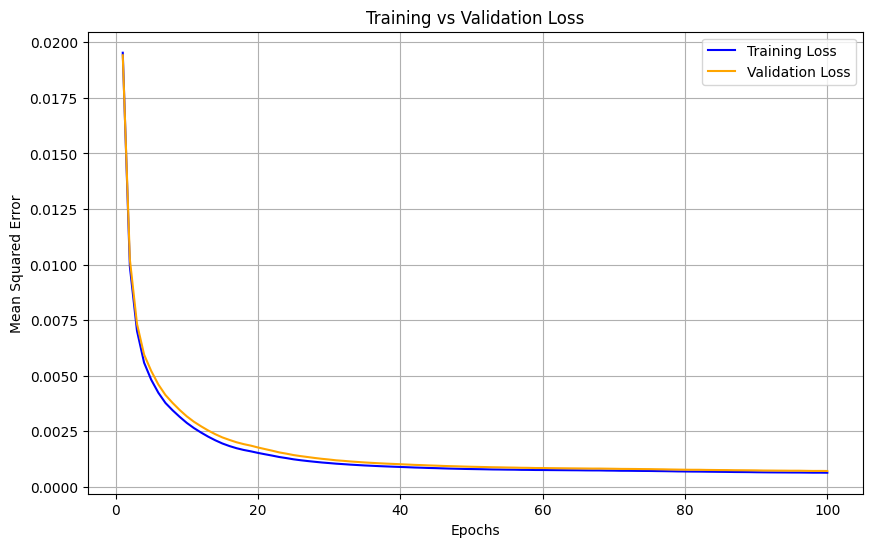

In [84]:
#@title 3. Nerual Network
# Step 1: Define the NN model
model_NN = MLPRegressor(hidden_layer_sizes=(50, 50, 50),      # Two hidden layers with 50 neurons each
                     activation='relu',                       # Activation function
                     solver='adam',                           # Optimizer
                     max_iter=100,                            # Number of epochs
                     random_state=42)

# Step 2: Train the model and track training and validation loss
train_loss = []
val_loss = []

for epoch in range(model_NN.max_iter):
    model_NN.partial_fit(X_train, y_train)  # Fit one epoch
    train_loss.append(mean_squared_error(y_train, model_NN.predict(X_train)))    # Training loss
    val_loss.append(mean_squared_error(y_test, model_NN.predict(X_test)))        # Validation loss

# Step 3: Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, model_NN.max_iter + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, model_NN.max_iter + 1), val_loss, label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

In [85]:
# Estimate Predictions
pred_model_NN_train= model_NN.predict(X_train)
pred_model_NN_test=model_NN.predict(X_test)
pred_model_NN = model_NN.predict(Xdata_new)
# Print the RMS Error and Score
print('RMSE for training data = ', round(mean_squared_error(y_train,pred_model_NN_train), 4))
print('R2 Score for training data = ', round(r2_score(y_train, pred_model_NN_train), 2))
print('RMSE for testing data = ', round(mean_squared_error(y_test,pred_model_NN_test), 4))
print('R2 Score for testing data = ', round(r2_score(y_test, pred_model_NN_test), 2))

RMSE for training data =  0.0006
R2 Score for training data =  0.95
RMSE for testing data =  0.0007
R2 Score for testing data =  0.94


In [90]:
# Add the prediction columns to the DataFrame 'df'
df_new['pred_L_reg'] = pred_L_reg
df_new['pred_RFR'] = pred_RFR
df_new['pred_NN'] = pred_model_NN
# the prediction DataFrame
prediction_df_new = df_new[['Time','Volume_of_Shale', 'pred_L_reg', 'pred_RFR', 'pred_NN']]
prediction_df_new

<ipython-input-90-12ef344b39f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['pred_L_reg'] = pred_L_reg
<ipython-input-90-12ef344b39f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['pred_RFR'] = pred_RFR
<ipython-input-90-12ef344b39f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,Time,Volume_of_Shale,pred_L_reg,pred_RFR,pred_NN
6415,500.013245,0.287900,0.246852,0.303497,0.338718
6416,500.082031,0.296800,0.247630,0.303857,0.336630
6417,500.150787,0.296800,0.248488,0.304053,0.335160
6418,500.219574,0.305336,0.249349,0.304765,0.333684
6419,500.288361,0.307450,0.250217,0.305037,0.332209
...,...,...,...,...,...
15463,1099.556885,0.401558,0.327273,0.401628,0.418413
15465,1099.689209,0.408565,0.327220,0.402522,0.419859
15466,1099.755371,0.404335,0.327198,0.402261,0.420566
15467,1099.821533,0.397629,0.327184,0.401450,0.421244


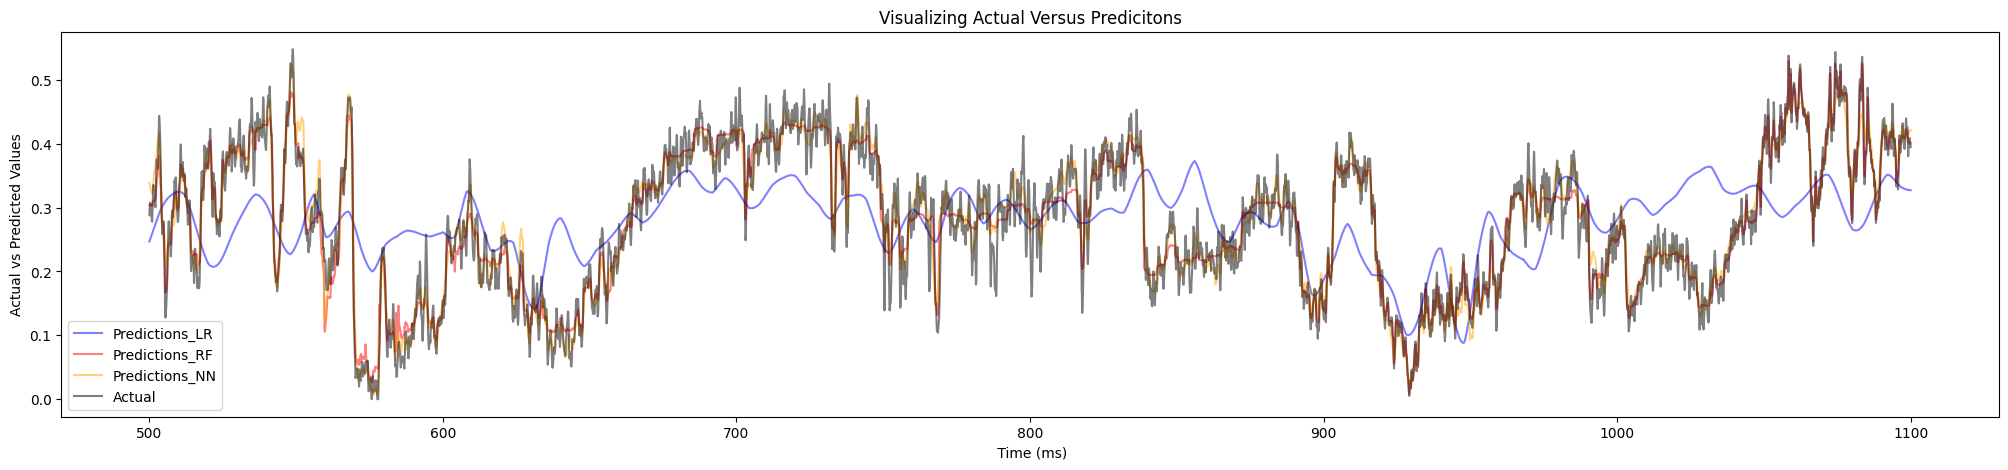

In [93]:
#@title Plotting Actual versus Predicted
#%%time

plt.figure(figsize=(25,5))
plt.plot(prediction_df_new['Time'], prediction_df_new['pred_L_reg'], c = 'blue', alpha=0.5, label = 'Predictions_LR' )
plt.plot(prediction_df_new['Time'], prediction_df_new['pred_RFR'], c = 'red', alpha=0.5, label = 'Predictions_RF' )
plt.plot(prediction_df_new['Time'], prediction_df_new['pred_NN'], c = 'orange', alpha=0.5, label = 'Predictions_NN' )
plt.plot(prediction_df_new['Time'], prediction_df_new['Volume_of_Shale'], c = 'black' , alpha=0.5, label = 'Actual')
plt.xlabel(" Time (ms)")
plt.ylabel("Actual vs Predicted Values")
plt.title("Visualizing Actual Versus Predicitons")
plt.legend()
plt.show()

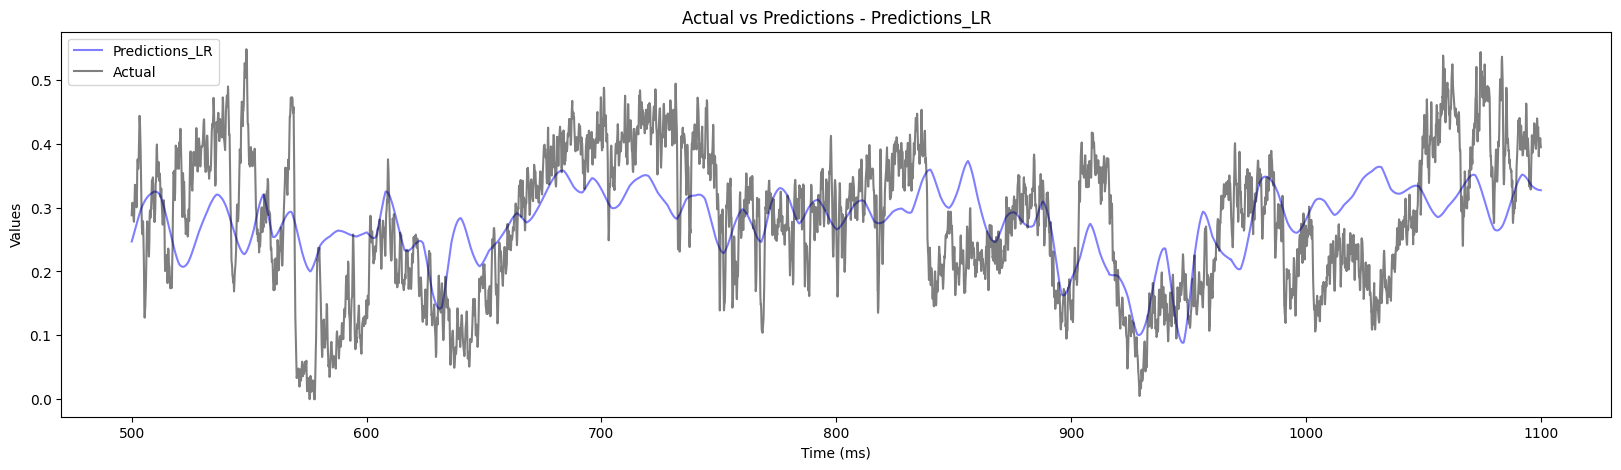

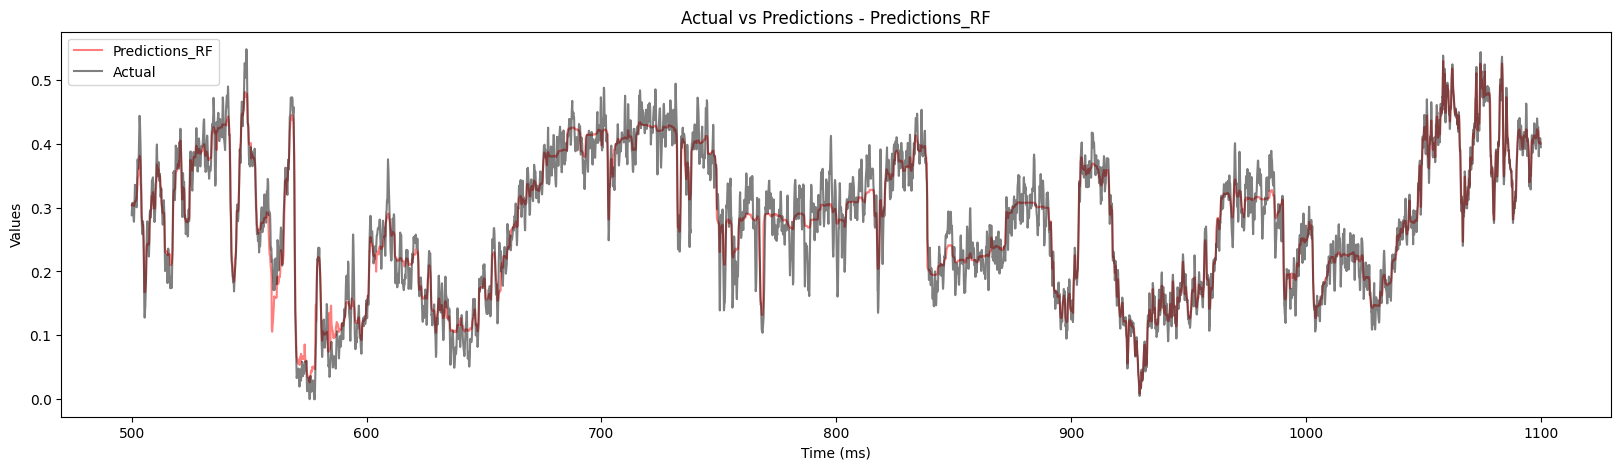

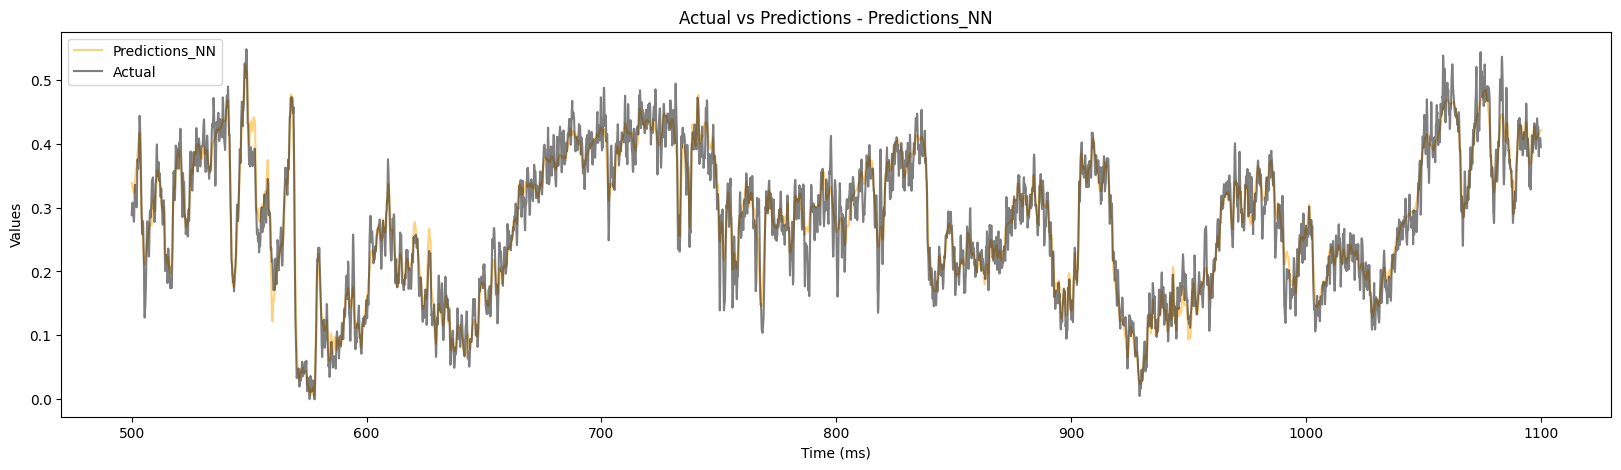

In [96]:
# Define a list of models and their respective colors and labels
models = [
    ('pred_L_reg', 'blue', 'Predictions_LR'),
    ('pred_RFR', 'red', 'Predictions_RF'),
    ('pred_NN', 'orange', 'Predictions_NN'),
]

# Actual values
actual = prediction_df_new['Volume_of_Shale']
depth = prediction_df_new['Time']

# Create separate plots for each model
for model, color, label in models:
    plt.figure(figsize=(20, 5))
    plt.plot(depth, prediction_df_new[model], c=color, alpha=0.5, label=label)
    plt.plot(depth, actual, c='black', alpha=0.5, label='Actual')

    # Labels and title
    plt.xlabel("Time (ms)")
    plt.ylabel("Values")
    plt.title(f"Actual vs Predictions - {label}")
    plt.legend()

    # Show the plot
    plt.show()

In [100]:
from google.colab import drive
import tensorflow as tf

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [101]:
#@title Save the Trained Models
import joblib
# Save the models to a file
joblib.dump(linear_reg, '/content/drive/MyDrive/Colab Notebooks/linear_regression_model.pkl')
joblib.dump(RFR, '/content/drive/MyDrive/Colab Notebooks/random_forest_model.pkl')
joblib.dump(model_NN, '/content/drive/MyDrive/Colab Notebooks/neural_network_model.pkl')
print("Models saved successfully!")

Models saved successfully!
